### Processing raw commit files

In [350]:
#import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [351]:
#combine all raw files into one
import glob
import os

os.makedirs("Data", exist_ok=True)
read_files = glob.glob("Raw/*.txt")
combined_content = ""

for i, f in enumerate(read_files):
    with open(f, "r") as infile:
        content = infile.read()
        if i > 0:
            content = content.lstrip().lstrip('[')
        if i < len(read_files) - 1:
            content = content.rstrip().rstrip(']') + ','
        combined_content += content

with open("Data/raw.txt", "w") as outfile:
    outfile.write(combined_content)

In [352]:
#read raw.txt file
raw = pd.read_json("Data/raw.txt") 

In [360]:
#split the data in 'commit' column
formated = pd.json_normalize(raw.commit)
#clear useless data
formated = formated.drop(['url', 'comment_count', 'author.email', 'author.date', 'committer.email', 'tree.sha', 'tree.url', 'verification.verified', 'verification.signature', 'verification.payload', 
    'verification.reason'], axis = 1)
#format committer date into date format
formated['committer.date'] = pd.to_datetime(formated['committer.date'].str.slice(0, 10))
#sort by date
formated = formated.sort_values(by = 'committer.date')
#export to csv file
formated.to_csv('Data/cleared.csv', index = False)
#print the result
formated

,message,author.name,committer.name,committer.date
999,Rename turbopack-tests-manifest to turbopack-d...,Tim Neutkens,GitHub,2024-03-19
998,Implement Turbopack build manifest update (#63...,Tim Neutkens,GitHub,2024-03-19
975,v14.2.0-canary.33,vercel-release-bot,vercel-release-bot,2024-03-19
976,Fix interception/detail routes being triggered...,Zack Tanner,GitHub,2024-03-19
978,Update opentelemetry docs #63443 (#63444)\n\nF...,Rafael Fernandes,GitHub,2024-03-19
...,...,...,...,...
113,Avoid race condition in ppr navigations test (...,Hendrik Liebau,GitHub,2024-06-05
110,Remove redundant React dependency declarations...,Sebastian Silbermann,GitHub,2024-06-05
115,feat(turbopack): Introduce `RcStr` (#66262)\n\...,Donny/강동윤,GitHub,2024-06-05
101,Update font data (#66582)\n\nThis auto-generat...,Vercel Release Bot,GitHub,2024-06-06


### Commits and contributors

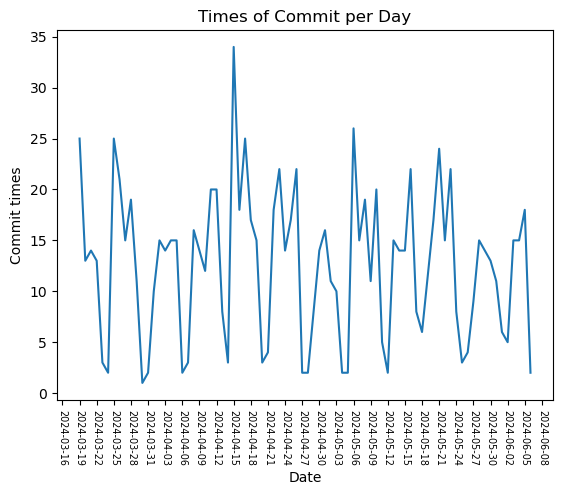

In [359]:
#Times of commit per day
date = formated["committer.date"].groupby(pd.to_datetime(formated['committer.date'])).count()
plt.plot(date.index, date.values)
plt.xlabel('Date')
plt.ylabel('Commit times')
plt.title('Times of commit per Day')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.xticks(rotation=270, fontweight='light',  fontsize='x-small')
plt.show()

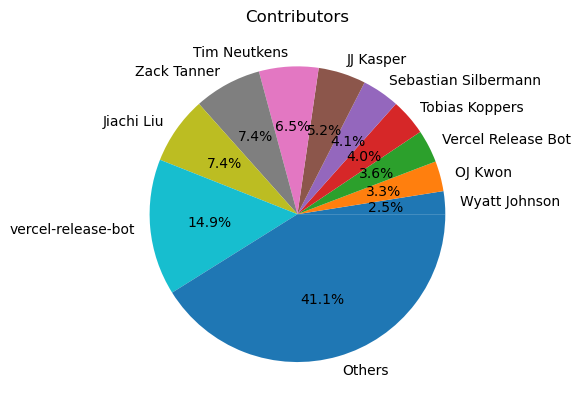

In [419]:
#Contributor
contri = formated['author.name'].groupby(formated['author.name']).count()
contri = contri.sort_values()
contri2 = contri[-10:].copy()
contri2.loc['Others'] = contri[:-10].sum()
plt.pie(contri2.values, labels=contri2.index, autopct='%1.1f%%')
plt.title('Contributors')
plt.show()